## Imports

In [9]:
import sys
sys.path.append("..")
from src import preprocess_mnist
from src import NNModel
from src import train_model
from src import plot_training_curves
from src import detect_convergence, plot_convergence
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os

## Displaying Non-Flattened MNIST Images

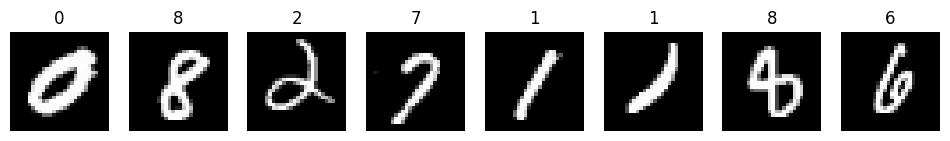

In [10]:
train_loader, val_loader, test_loader = preprocess_mnist(flatten=False)

images, labels = next(iter(train_loader))
fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i in range(8):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(str(labels[i].item()))
    axes[i].axis('off')
plt.show()


## Displaying Flattened MNIST Data Information

In [11]:
train_loader, val_loader, test_loader = preprocess_mnist(batch_size=64, augment=False, flatten=True)

images, labels = next(iter(train_loader))
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")
print(f"Example labels: {labels[:10]}")

Images batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])
Example labels: tensor([0, 1, 4, 3, 1, 2, 6, 2, 6, 2])


Epoch 1/50 | Train Loss: 1.0676 | Train Acc: 72.24% | Val Loss: 0.4933 | Val Acc: 86.54%
New best model found (val_loss=0.4933)
Model saved to ./checkpoints/mnist.pth
Epoch 2/50 | Train Loss: 0.3929 | Train Acc: 88.96% | Val Loss: 0.3560 | Val Acc: 89.78%
New best model found (val_loss=0.3560)
Model saved to ./checkpoints/mnist.pth
Epoch 3/50 | Train Loss: 0.3131 | Train Acc: 91.00% | Val Loss: 0.3055 | Val Acc: 91.26%
New best model found (val_loss=0.3055)
Model saved to ./checkpoints/mnist.pth
Epoch 4/50 | Train Loss: 0.2719 | Train Acc: 92.15% | Val Loss: 0.2866 | Val Acc: 91.91%
New best model found (val_loss=0.2866)
Model saved to ./checkpoints/mnist.pth
Epoch 5/50 | Train Loss: 0.2418 | Train Acc: 93.00% | Val Loss: 0.2489 | Val Acc: 92.74%
New best model found (val_loss=0.2489)
Model saved to ./checkpoints/mnist.pth
Epoch 6/50 | Train Loss: 0.2200 | Train Acc: 93.71% | Val Loss: 0.2264 | Val Acc: 93.53%
New best model found (val_loss=0.2264)
Model saved to ./checkpoints/mnist.pt

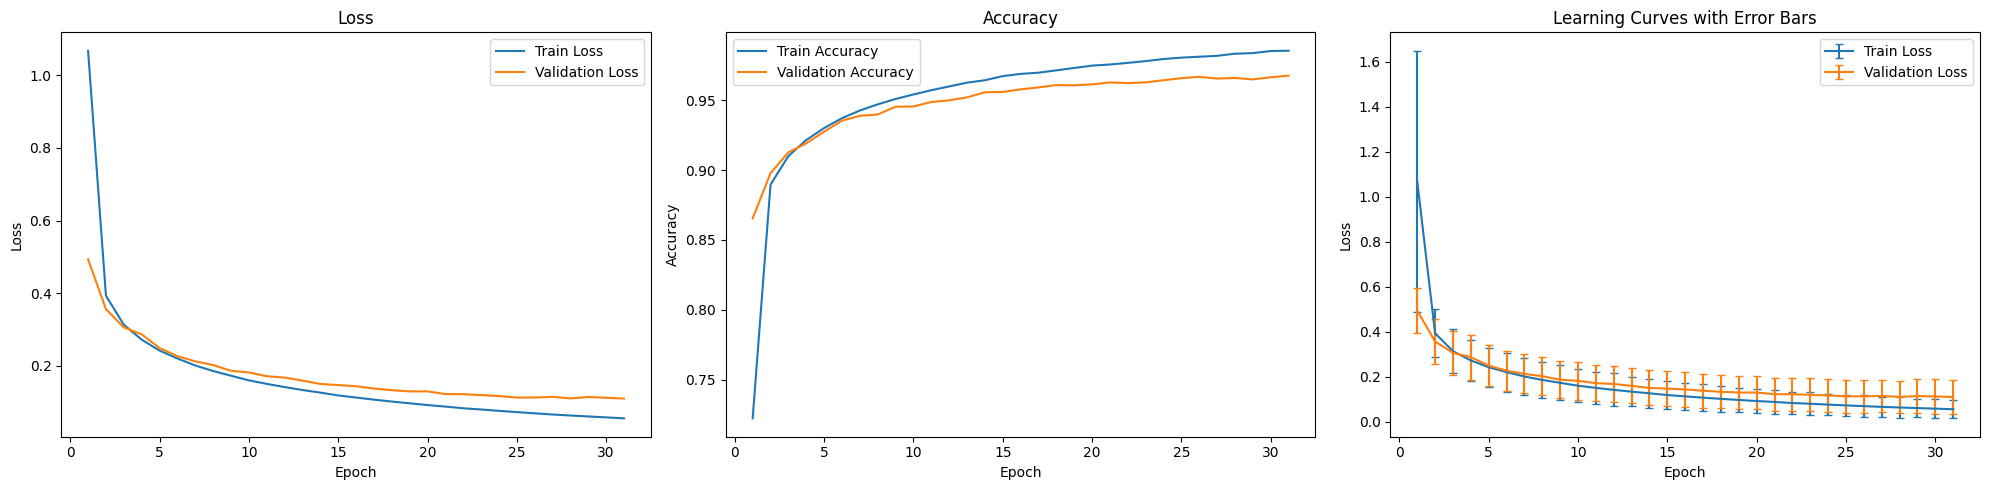

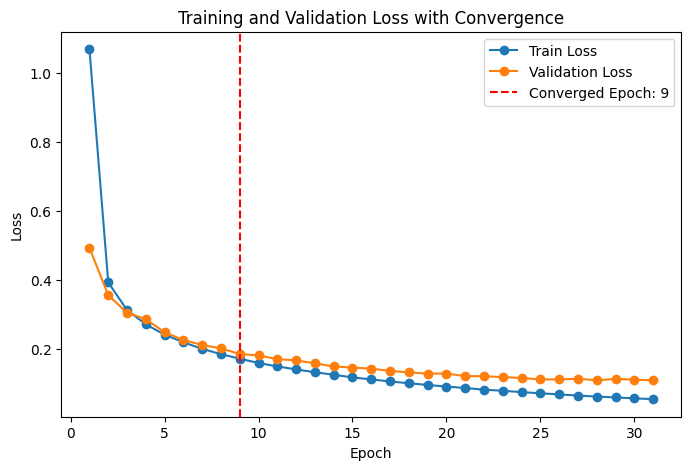

In [12]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model, loss, optimizer
model = NNModel().to(device)
model.apply(model._init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 50

checkpoint_path = "./checkpoints/mnist.pth"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
# Train
history = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=epochs, device=device, checkpoint_path=checkpoint_path)

# Plot
plot_training_curves(history)
conv_epoch = detect_convergence(history["val_loss_mean"])
plot_convergence(history["train_loss_mean"], history["val_loss_mean"], conv_epoch)
